In [1]:
import os
import pandas as pd
import json
from src.result_analysis import create_precision_recall_plot, create_precision_plot
pd.set_option('display.max_colwidth', None)


def make_sorted_labels(precision_table):
    return [elem(str) for elem in sorted(list([int(e) for e in precision_table[0].keys()]))]


def make_precision_table(experiments, levels=[1,5,10], round_signs=3):
    precision_table = []
    exp_names = []
    for exp_path in experiments:
        if type(exp_path) is tuple:
            exp_path, exp_name = exp_path
        else:
            exp_name = exp_path.split('/')[-1]
        
        exp_names.append(exp_name)
        with open(os.path.join(exp_path, 'precision.json')) as f:
            precision_dict = json.load(f)
        row = {"model": exp_name}
        row1 = {level : round(prec, round_signs) for level, prec in precision_dict['precisions_at_level'].items()}
        for k,v in row1.items():
            row[k] = v
            
        if levels is None:
            levels = [str(lev) for lev in sorted([int(e) for e in precision_dict['precisions_at_level'].keys()])]
        else:
            levels = [str(lev) for lev in levels]

            row['MAP'] = round(precision_dict['map'], round_signs)
        
        precision_table.append(row)
    
    return pd.DataFrame(precision_table)[['model']+ levels + ['MAP']]


def create_multiple_curves(experiments, score_file_name):
    curves = {}
    for exp in experiments:
        if type(exp) is tuple:
            exp, exp_name = exp
        else:
            exp_name = exp.split('/')[-1]
        curve = pd.read_csv(os.path.join(exp, score_file_name))
        curves[exp_name] = curve
    return curves


def create_multiple_precision_recall_curves(experiments):
    return create_multiple_curves(experiments, 'precision_recall.csv')


def create_multiple_precision_curves(experiments):
    return create_multiple_curves(experiments, 'precs_all_hard.csv')

In [ ]:
!python ./run_evaluate.py \
--results_path=../workdir/results/test-melamud_preds_st


In [16]:
!python -m src.run_evaluate \
--results_path=workdir/results/test-paper_preds_st_unionranked


blc-ntok1-nunits1-nomask-k200  ########################
100%|███████████████████████████████████| 3533/3533 [00:00<00:00, 659331.53it/s]
Precision at levels:
(1, 0.4390036795924144)
(5, 0.28881969997169543)
(10, 0.2283328615907161)
(20, 0.1733795641098217)
MAP:  0.1594701184366986
Precision recall curve
    precision    recall
0    0.439004  0.015555
1    0.377583  0.026757
2    0.337390  0.035863
3    0.308590  0.043736
4    0.288820  0.051167
5    0.273516  0.058147
6    0.258704  0.064165
7    0.247382  0.070122
8    0.237287  0.075668
9    0.228333  0.080903
10   0.220621  0.085988
11   0.213416  0.090741
12   0.207451  0.095555
13   0.200962  0.099687
14   0.195509  0.103909
15   0.190578  0.108041
16   0.185778  0.111902
17   0.181244  0.115593
18   0.177082  0.119213
19   0.173380  0.122864
20   0.169787  0.126334
21   0.166624  0.129884
22   0.163256  0.133043
23   0.160263  0.136282
24   0.157339  0.139371
25   0.154652  0.142470
26   0.152415  0.145810
27   0.149933  0.148748

100%|████████████████████████████████████| 3533/3533 [00:00<00:00, 88127.58it/s]
Precision at levels:
(1, 0.48429097084630623)
(5, 0.33405038211151994)
(10, 0.2675346730823663)
(20, 0.20823662609680157)
MAP:  0.20058684611195243
Precision recall curve
    precision    recall
0    0.484291  0.017159
1    0.425417  0.030147
2    0.388433  0.041289
3    0.358265  0.050776
4    0.334050  0.059180
5    0.316445  0.067274
6    0.299745  0.074344
7    0.287645  0.081535
8    0.276127  0.088054
9    0.267535  0.094793
10   0.258549  0.100770
11   0.250519  0.106517
12   0.243180  0.112013
13   0.237152  0.117639
14   0.230833  0.122683
15   0.225640  0.127918
16   0.220776  0.132983
17   0.216451  0.138048
18   0.212374  0.142972
19   0.208237  0.147565
20   0.203941  0.151747
21   0.200216  0.156069
22   0.196557  0.160181
23   0.193143  0.164243
24   0.189946  0.168255
25   0.186647  0.171945
26   0.183455  0.175505
27   0.180563  0.179136
28   0.178084  0.182987
29   0.175262  0.186297
30  

100%|███████████████████████████████████| 3533/3533 [00:00<00:00, 344015.69it/s]
Precision at levels:
(1, 0.4797622417209171)
(5, 0.3178601754882536)
(10, 0.2531276535522219)
(20, 0.19497594112652136)
MAP:  0.18217209786237856
Precision recall curve
    precision    recall
0    0.479762  0.016999
1    0.414237  0.029355
2    0.370695  0.039403
3    0.342414  0.048530
4    0.317860  0.056312
5    0.301962  0.064195
6    0.285957  0.070924
7    0.274236  0.077734
8    0.263138  0.083912
9    0.253128  0.089688
10   0.244526  0.095304
11   0.236461  0.100540
12   0.230617  0.106226
13   0.224597  0.111411
14   0.218549  0.116155
15   0.213310  0.120928
16   0.208022  0.125301
17   0.203384  0.129714
18   0.199085  0.134026
19   0.194976  0.138168
20   0.191002  0.142119
21   0.187749  0.146351
22   0.184226  0.150132
23   0.180819  0.153763
24   0.177741  0.157443
25   0.174813  0.161044
26   0.172176  0.164714
27   0.169625  0.168285
28   0.167299  0.171905
29   0.164789  0.175164
30   0

100%|███████████████████████████████████| 3533/3533 [00:00<00:00, 548852.77it/s]
Precision at levels:
(1, 0.39767902632323804)
(5, 0.2984432493631475)
(10, 0.24245683555052364)
(20, 0.1869515992074724)
MAP:  0.16584342772143368
Precision recall curve
    precision    recall
0    0.397679  0.014091
1    0.366827  0.025995
2    0.337956  0.035923
3    0.314817  0.044619
4    0.298443  0.052872
5    0.285782  0.060755
6    0.272209  0.067514
7    0.261817  0.074214
8    0.252068  0.080381
9    0.242457  0.085907
10   0.234207  0.091283
11   0.226955  0.096498
12   0.220514  0.101573
13   0.214346  0.106326
14   0.208208  0.110659
15   0.203156  0.115172
16   0.199131  0.119945
17   0.194893  0.124298
18   0.190609  0.128320
19   0.186952  0.132482
20   0.183225  0.136333
21   0.179747  0.140114
22   0.176485  0.143824
23   0.173472  0.147515
24   0.170914  0.151396
25   0.168554  0.155277
26   0.166274  0.159068
27   0.164136  0.162839
28   0.162058  0.166520
29   0.159666  0.169719
30   

100%|███████████████████████████████████| 3533/3533 [00:00<00:00, 199205.19it/s]
Precision at levels:
(1, 0.38013020096235495)
(5, 0.280215114633456)
(10, 0.22765355222190772)
(20, 0.17632323804132466)
MAP:  0.1546268581567595
Precision recall curve
    precision    recall
0    0.380130  0.013469
1    0.345316  0.024470
2    0.316728  0.033667
3    0.296136  0.041971
4    0.280215  0.049643
5    0.268044  0.056984
6    0.254418  0.063102
7    0.244021  0.069169
8    0.235683  0.075156
9    0.227654  0.080662
10   0.221007  0.086138
11   0.214053  0.091012
12   0.208430  0.096006
13   0.202580  0.100489
14   0.197698  0.105073
15   0.192931  0.109375
16   0.188608  0.113607
17   0.184624  0.117749
18   0.180330  0.121400
19   0.176323  0.124950
20   0.172725  0.128520
21   0.169210  0.131900
22   0.166062  0.135330
23   0.163081  0.138679
24   0.160226  0.141929
25   0.157754  0.145329
26   0.155423  0.148688
27   0.153269  0.152058
28   0.151127  0.155287
29   0.149042  0.158426
30   0

In [ ]:
!python ./run_evaluate.py \
--results_path=../workdir/results/test-paper_preds_st_merged


In [ ]:
!python ./run_evaluate.py \
--results_path=../workdir/results/test-paper_roles_st


In [ ]:
!python ./run_evaluate.py \
--results_path=../workdir/results/test-paper_roles_st_merged


In [ ]:
!python ./run_evaluate.py \
--results_path=../workdir/results/test-melamud_roles_st


# Tables

## single models

### Lexical units

In [11]:
result_dir = 'workdir/results'
experiments = [

    (f'{result_dir}/test-paper_preds_st/glove_840B_nolem/', 'GloVe'),
    (f'{result_dir}/test-paper_preds_st/fasttext_cc_nolem/', 'fastText'),
    (f'{result_dir}/test-paper_preds_st/word2vec_googlenews_nolem/', 'word2vec'),
    
    (f'{result_dir}/test-paper_preds_st/dt_wiki_lem', 'DT wiki'),
    (f'{result_dir}/test-paper_preds_st/dt_59g_lem', 'DT 59g'),
    
    (f'{result_dir}/test-melamud_preds_st/melamud_add', 'Melamud add'),
    (f'{result_dir}/test-melamud_preds_st/melamud_baladd', 'Melamud balAdd'),
    (f'{result_dir}/test-melamud_preds_st/melamud_mult', 'Melamud mult'),
    (f'{result_dir}/test-melamud_preds_st/melamud_balmult', 'Melamud balMult'),

    (f'{result_dir}/test-paper_preds_st/blc-ntok1-nunits1-mask-k200', 'BERT large cased with mask'),
    (f'{result_dir}/test-paper_preds_st/blc-ntok1-nunits1-nomask-k200', 'BERT large cased w/o mask'),
#     (f'{result_dir}/test-paper_preds_st/blu-ntok1-nunits1-mask-k200', 'BERT large uncased with mask'),
#     (f'{result_dir}/test-paper_preds_st/blu-ntok1-nunits1-nomask-k200', 'BERT large uncased w/o mask'),
    
#     (f'{result_dir}/test-paper_preds_st/bbc-ntok1-nunits1-mask-k200', 'BERT base cased with mask'),
#     (f'{result_dir}/test-paper_preds_st/bbc-ntok1-nunits1-nomask-k200', 'BERT base cased w/o mask'),
#     (f'{result_dir}/test-paper_preds_st/bbu-ntok1-nunits1-mask-k200', 'BERT base uncased with mask'),
#     (f'{result_dir}/test-paper_preds_st/bbu-ntok1-nunits1-nomask-k200', 'BERT base uncased w/o mask'),
    
    (f'workdir/results_embs/gie-swv_test-BRX-top200-defaulthypers/gie_swv_test_semiPUREroberta', 'RoBERTa'),
     (f'workdir/results_embs/gie-swv_test-BRX-top200-defaulthypers/gie_swv_test_semiPURExlnet', 'XLNet'),

    
    
    
#     (f'{result_dir}/test-paper_preds_st/blc-ntok1-nunits1-mask-k200-Tand', 'BERT large cased Tand w mask'),
    (f'{result_dir}/test-paper_preds_st/blc-ntok1-nunits1-nomask-k200-Tand', 'BERT large cased Tand w/o mask'),
    (f'{result_dir}/test-paper_preds_st/blc-ntok1-nunits1-nomask-k200-TandT', 'BERT large cased TandT w/o mask'),

#     (f'{result_dir}/test-paper_preds_st/blc-ntok1-nunits1-mask-k200-Tandthen', 'BERT large cased Tandthen w mask'),
#     (f'{result_dir}/test-paper_preds_st/blc-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large cased Tandthen w/o mask'),
#     (f'{result_dir}/test-paper_preds_st/blc-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large cased TandthenT w/o mask'),

#     (f'{result_dir}/test-paper_preds_st/blu-ntok1-nunits1-mask-k200-Tand', 'BERT large uncased Tand w mask'),
#     (f'{result_dir}/test-paper_preds_st/blu-ntok1-nunits1-nomask-k200-Tand', 'BERT large uncased Tand w/o mask'),
#     (f'{result_dir}/test-paper_preds_st/blu-ntok1-nunits1-nomask-k200-TandT', 'BERT large uncased TandT w/o mask'),
    
#     (f'{result_dir}/test-paper_preds_st/blu-ntok1-nunits1-mask-k200-Tandthen', 'BERT large uncased Tandthen w mask'),
#     (f'{result_dir}/test-paper_preds_st/blu-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large uncased Tandthen w/o mask'),
#     (f'{result_dir}/test-paper_preds_st/blu-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large uncased TandthenT w/o mask'),
    ('workdir/results_embs/gie-swv_test-BRX-top200-defaulthypers/gie_swv_test_PUREbert_embs', 'BERT embs'),
    ('workdir/results_embs/gie-swv_test-BRX-top200-defaulthypers/gie_swv_test_semiPUREroberta_embs', 'RoBERTa embs'),
    ('workdir/results_embs/gie-swv_test-BRX-top200-defaulthypers/gie_swv_test_semiPURExlnet_embs', 'XLNet embs'),
    
    
    (f'workdir/results_embs/gie-swv_test-BRX-top200-optimalhypers/gie_swv_test_semiPURExlnet_embs_swvhypers', 'optimal XLNet embs')


]


result_table = make_precision_table(experiments)
result_table=result_table.set_index("model")
result_table

,1,5,10,MAP
model,,,,
GloVe,0.373,0.254,0.205,0.131
fastText,0.388,0.286,0.233,0.156
word2vec,0.388,0.273,0.220,0.151
DT wiki,0.313,0.208,0.169,0.106
DT 59g,0.353,0.255,0.211,0.141
Melamud add,0.326,0.234,0.194,0.125
Melamud balAdd,0.393,0.281,0.229,0.156
Melamud mult,0.279,0.206,0.172,0.107
Melamud balMult,0.390,0.279,0.227,0.154


In [44]:
print(result_table.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &      1 &      5 &     10 &    MAP \\
model                           &        &        &        &        \\
\midrule
GloVe                           &  0.373 &  0.254 &  0.205 &  0.131 \\
fastText                        &  0.388 &  0.286 &  0.233 &  0.156 \\
word2vec                        &  0.388 &  0.273 &  0.220 &  0.151 \\
DT wiki                         &  0.313 &  0.208 &  0.169 &  0.106 \\
DT 59g                          &  0.353 &  0.255 &  0.211 &  0.141 \\
Melamud add                     &  0.326 &  0.234 &  0.194 &  0.125 \\
Melamud balAdd                  &  0.393 &  0.281 &  0.229 &  0.156 \\
Melamud mult                    &  0.279 &  0.206 &  0.172 &  0.107 \\
Melamud balMult                 &  0.390 &  0.279 &  0.227 &  0.154 \\
BERT large cased w/o mask       &  0.386 &  0.264 &  0.207 &  0.137 \\
RoBERTa                         &  0.291 &  0.204 &  0.159 &  0.103 \\
XLNet                           &  0.352 &  0.260 &  0.214 &  0.1

### Roles

In [10]:
result_dir = 'workdir/results'
experiments = [

    (f'{result_dir}/test-paper_roles_st/glove_840B_nolem/', 'GloVe'),
    (f'{result_dir}/test-paper_roles_st/fasttext_cc_nolem/', 'fastText'),
    (f'{result_dir}/test-paper_roles_st/word2vec_googlenews_nolem/', 'word2vec'),
    
    (f'{result_dir}/test-paper_roles_st/dt_wiki_lem', 'DT wiki'),
    (f'{result_dir}/test-paper_roles_st/dt_59g_lem', 'DT 59g'),
    
    (f'{result_dir}/test-melamud_roles_st/melamud_add', 'Melamud add'),
    (f'{result_dir}/test-melamud_roles_st/melamud_baladd', 'Melamud balAdd'),
    (f'{result_dir}/test-melamud_roles_st/melamud_mult', 'Melamud mult'),
    (f'{result_dir}/test-melamud_roles_st/melamud_balmult', 'Melamud balMult'),

    (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-mask-k200', 'BERT large cased with mask'),
    (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-nomask-k200', 'BERT large cased w/o mask'),
#     (f'{result_dir}/test-paper_roles_st/blu-ntok1-nunits1-mask-k200', 'BERT large uncased with mask'),
#     (f'{result_dir}/test-paper_roles_st/blu-ntok1-nunits1-nomask-k200', 'BERT large uncased w/o mask'),
    
#     (f'{result_dir}/test-paper_roles_st/bbc-ntok1-nunits1-mask-k200', 'BERT base cased with mask'),
#     (f'{result_dir}/test-paper_roles_st/bbc-ntok1-nunits1-nomask-k200', 'BERT base cased w/o mask'),
#     (f'{result_dir}/test-paper_roles_st/bbu-ntok1-nunits1-mask-k200', 'BERT base uncased with mask'),
#     (f'{result_dir}/test-paper_roles_st/bbu-ntok1-nunits1-nomask-k200', 'BERT base uncased w/o mask'),
    
    (f'workdir/results_embs/gie-swr_test-BRX-top200-defaulthypers/gie_swr_test_semiPUREroberta', 'RoBERTa'),
     (f'workdir/results_embs/gie-swr_test-BRX-top200-defaulthypers/gie_swr_test_semiPURExlnet', 'XLNet'),

    
    
    
#     (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-mask-k200-Tand', 'BERT large cased Tand w mask'),
    (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-nomask-k200-Tand', 'BERT large cased Tand w/o mask'),
    
    (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-nomask-k200-TandT', 'BERT large cased TandT w/o mask'),
    (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-mask-k200-TandT', 'BERT large cased TandT w mask'),

#     (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-mask-k200-Tandthen', 'BERT large cased Tandthen w mask'),
#     (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large cased Tandthen w/o mask'),
#     (f'{result_dir}/test-paper_roles_st/blc-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large cased TandthenT w/o mask'),

#     (f'{result_dir}/test-paper_roles_st/blu-ntok1-nunits1-mask-k200-Tand', 'BERT large uncased Tand w mask'),
#     (f'{result_dir}/test-paper_roles_st/blu-ntok1-nunits1-nomask-k200-Tand', 'BERT large uncased Tand w/o mask'),
#     (f'{result_dir}/test-paper_roles_st/blu-ntok1-nunits1-nomask-k200-TandT', 'BERT large uncased TandT w/o mask'),
    
#     (f'{result_dir}/test-paper_roles_st/blu-ntok1-nunits1-mask-k200-Tandthen', 'BERT large uncased Tandthen w mask'),
#     (f'{result_dir}/test-paper_roles_st/blu-ntok1-nunits1-nomask-k200-Tandthen', 'BERT large uncased Tandthen w/o mask'),
#     (f'{result_dir}/test-paper_roles_st/blu-ntok1-nunits1-nomask-k200-TandthenT', 'BERT large uncased TandthenT w/o mask'),
    ('workdir/results_embs/gie-swr_test-BRX-top200-defaulthypers/gie_swr_test_PUREbert_embs', 'BERT embs'),
    ('workdir/results_embs/gie-swr_test-BRX-top200-defaulthypers/gie_swr_test_semiPUREroberta_embs', 'RoBERTa embs'),
    ('workdir/results_embs/gie-swr_test-BRX-top200-defaulthypers/gie_swr_test_semiPURExlnet_embs', 'XLNet embs'),
    
    
    (f'workdir/results_embs/gie-swr_test-BRX-top200-optimalhypers/gie_swr_test_semiPURExlnet_embs_swrhypers', 'optimal XLNet embs')


]


result_table2 = make_precision_table(experiments)
result_table2=result_table2.set_index("model")
result_table2

,1,5,10,MAP
model,,,,
GloVe,0.303,0.251,0.202,0.070
fastText,0.184,0.135,0.102,0.029
word2vec,0.319,0.223,0.165,0.051
DT wiki,0.368,0.281,0.241,0.091
DT 59g,0.350,0.273,0.223,0.086
Melamud add,0.369,0.278,0.204,0.070
Melamud balAdd,0.378,0.284,0.208,0.072
Melamud mult,0.355,0.265,0.194,0.066
Melamud balMult,0.375,0.277,0.203,0.070


In [45]:
for c in result_table2.columns:
    result_table[c+'-role'] = result_table2[c]
    
result_table    

,1,5,10,MAP,1-role,5-role,10-role,MAP-role
model,,,,,,,,
GloVe,0.373,0.254,0.205,0.131,0.303,0.251,0.202,0.070
fastText,0.388,0.286,0.233,0.156,0.184,0.135,0.102,0.029
word2vec,0.388,0.273,0.220,0.151,0.319,0.223,0.165,0.051
DT wiki,0.313,0.208,0.169,0.106,0.368,0.281,0.241,0.091
DT 59g,0.353,0.255,0.211,0.141,0.350,0.273,0.223,0.086
Melamud add,0.326,0.234,0.194,0.125,0.369,0.278,0.204,0.070
Melamud balAdd,0.393,0.281,0.229,0.156,0.378,0.284,0.208,0.072
Melamud mult,0.279,0.206,0.172,0.107,0.355,0.265,0.194,0.066
Melamud balMult,0.390,0.279,0.227,0.154,0.375,0.277,0.203,0.070


In [47]:
print(result_table.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &      1 &      5 &     10 &    MAP &  1-role &  5-role &  10-role &  MAP-role \\
model                           &        &        &        &        &         &         &          &           \\
\midrule
GloVe                           &  0.373 &  0.254 &  0.205 &  0.131 &   0.303 &   0.251 &    0.202 &     0.070 \\
fastText                        &  0.388 &  0.286 &  0.233 &  0.156 &   0.184 &   0.135 &    0.102 &     0.029 \\
word2vec                        &  0.388 &  0.273 &  0.220 &  0.151 &   0.319 &   0.223 &    0.165 &     0.051 \\
DT wiki                         &  0.313 &  0.208 &  0.169 &  0.106 &   0.368 &   0.281 &    0.241 &     0.091 \\
DT 59g                          &  0.353 &  0.255 &  0.211 &  0.141 &   0.350 &   0.273 &    0.223 &     0.086 \\
Melamud add                     &  0.326 &  0.234 &  0.194 &  0.125 &   0.369 &   0.278 &    0.204 &     0.070 \\
Melamud balAdd                  &  0.393 &  0.281 &  0.229 &  0.156 &   

## Merged models

### simplyfy names for merged models

In [2]:
def pretify(x):
    
    x = x.replace("gie_swv_test_semiPURExlnet_embs_swvhypers", "XLNet embs")
    x = x.replace("gie_swr_test_semiPURExlnet_embs_swrhypers", "XLNet embs")
    
    x = x.replace("gie_swv_test_semiPURExlnet", "XLNet")
    x = x.replace("gie_swr_test_semiPURExlnet", "XLNet")

    x = x.replace("-ntok1-nunits1-nomask-k200", "")
    x = x.replace("-ntok1-nunits1-mask-k200", "")

    x = x.replace("blc", "BERT")
    x = x.replace("-TandT", " [TandT]")
    x = x.replace("glove_840B_nolem", "emb")
    x = x.replace("fasttext_cc_nolem", "emb")
    x = x.replace("dt_59g_lem", "DT")
    x = x.replace("dt_wiki_lem", "DT")
    x = x.replace("melamud_baladd", "Melamud balAdd")
    x = x.strip()
    
    order = {"XLNet embs": 0,
             "XLNet": 1,
            "BERT [TandT]":2,
            "BERT":3,
            "Melamud balAdd":4,
             "emb" : 5,
             "DT":6
            }
    
    x = x.split("+")
#     print(x)
    o = [(t, order[t]) for t in x]
    o = sorted(o, key=lambda x:x[1])
    x = [t[0] for t in o]
#     print(x)
    x = " + ".join(x)

    return x


In [3]:
path = "workdir/results/test-paper_preds_st_merged"
experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]
# experiments = [exp for exp in experiments if "dt" in exp]
experiments.sort()
result_table = make_precision_table(experiments)
result_table['model']=result_table['model'].apply(lambda x:pretify(x))
result_table= result_table.sort_values(by='model', ascending=True).reset_index(drop=True)
result_table=result_table.set_index("model")
result_table

,1,5,10,MAP
model,,,,
BERT + DT,0.451,0.297,0.235,0.155
BERT + Melamud balAdd,0.469,0.316,0.250,0.175
BERT + Melamud balAdd + DT,0.482,0.333,0.271,0.193
BERT + Melamud balAdd + emb,0.478,0.328,0.266,0.192
BERT + Melamud balAdd + emb + DT,0.483,0.340,0.279,0.202
BERT + emb,0.460,0.308,0.243,0.170
BERT + emb + DT,0.471,0.323,0.263,0.187
BERT [TandT] + DT,0.461,0.300,0.236,0.156
BERT [TandT] + Melamud balAdd,0.475,0.318,0.250,0.176


In [109]:
# print(result_table.to_latex())

In [4]:
path = "workdir/results/test-paper_roles_st_merged"
experiments = os.listdir(path)
experiments = [f'{path}/{exp}' for exp in experiments if not "." in exp]
# experiments = [exp for exp in experiments if "T" in exp]
experiments.sort()
result_table2 = make_precision_table(experiments)
result_table2['model']=result_table2['model'].apply(lambda x:pretify(x))
result_table2= result_table2.sort_values(by='model', ascending=True).reset_index(drop=True)
result_table2=result_table2.set_index("model")
result_table2

,1,5,10,MAP
model,,,,
BERT + DT,0.460,0.386,0.318,0.124
BERT + Melamud balAdd,0.544,0.464,0.368,0.134
BERT + Melamud balAdd + DT,0.524,0.448,0.367,0.146
BERT + Melamud balAdd + emb,0.533,0.444,0.360,0.141
BERT + Melamud balAdd + emb + DT,0.526,0.441,0.367,0.149
BERT + emb,0.465,0.357,0.295,0.113
BERT + emb + DT,0.416,0.369,0.308,0.112
BERT [TandT] + DT,0.447,0.380,0.313,0.122
BERT [TandT] + Melamud balAdd,0.533,0.454,0.359,0.131


In [86]:
# print(result_table2.to_latex())

In [5]:
for c in result_table2.columns:
    result_table[c+'-role'] = result_table2[c]
    
# result_table=result_table.set_index("model")
result_table    

,1,5,10,MAP,1-role,5-role,10-role,MAP-role
model,,,,,,,,
BERT + DT,0.451,0.297,0.235,0.155,0.460,0.386,0.318,0.124
BERT + Melamud balAdd,0.469,0.316,0.250,0.175,0.544,0.464,0.368,0.134
BERT + Melamud balAdd + DT,0.482,0.333,0.271,0.193,0.524,0.448,0.367,0.146
BERT + Melamud balAdd + emb,0.478,0.328,0.266,0.192,0.533,0.444,0.360,0.141
BERT + Melamud balAdd + emb + DT,0.483,0.340,0.279,0.202,0.526,0.441,0.367,0.149
BERT + emb,0.460,0.308,0.243,0.170,0.465,0.357,0.295,0.113
BERT + emb + DT,0.471,0.323,0.263,0.187,0.416,0.369,0.308,0.112
BERT [TandT] + DT,0.461,0.300,0.236,0.156,0.447,0.380,0.313,0.122
BERT [TandT] + Melamud balAdd,0.475,0.318,0.250,0.176,0.533,0.454,0.359,0.131


In [6]:
print(result_table.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &      1 &      5 &     10 &    MAP &  1-role &  5-role &  10-role &  MAP-role \\
model                                    &        &        &        &        &         &         &          &           \\
\midrule
BERT + DT                                &  0.451 &  0.297 &  0.235 &  0.155 &   0.460 &   0.386 &    0.318 &     0.124 \\
BERT + Melamud balAdd                    &  0.469 &  0.316 &  0.250 &  0.175 &   0.544 &   0.464 &    0.368 &     0.134 \\
BERT + Melamud balAdd + DT               &  0.482 &  0.333 &  0.271 &  0.193 &   0.524 &   0.448 &    0.367 &     0.146 \\
BERT + Melamud balAdd + emb              &  0.478 &  0.328 &  0.266 &  0.192 &   0.533 &   0.444 &    0.360 &     0.141 \\
BERT + Melamud balAdd + emb + DT         &  0.483 &  0.340 &  0.279 &  0.202 &   0.526 &   0.441 &    0.367 &     0.149 \\
BERT + emb                               &  0.460 &  0.308 &  0.243 &  0.170 &   0.465 &   0.357 &    0.295 &     0.113 \\
BERT + em

# Figures

In [ ]:
base_output_path = '../workdir/plots/paper2/'

## Lexical units

In [ ]:
# DSM Figure

output_path = base_output_path + 'preds_dsm.png'

experiments = [
    ('../workdir/results/paper_preds_st_3/glove_840B_nolem', 'GloVe 840B', '#ffff00'),
    ('../workdir/results/paper_preds_st_3/fasttext_cc_nolem', 'fastText CC', '#cc3300'),
    ('../workdir/results/paper_preds_st_3/word2vec_googlenews_nolem', 'word2vec GN', '#ff9900'),
    ('../workdir/results/paper_preds_st_3/dt_59g_lem', 'DT 59g', 'g'),
    ('../workdir/results/paper_preds_st_3/dt_wiki_lem', 'DT wiki', '#4EEE94')
]

# colors = ['#63B8FF',  'b',  '#DB7093', 'red', '#696969',  'black', 'b',
#             '#660066', 'brown', '#FFC0CB', '#00FF00', 'red', '#FF8C00']

colors = [exp[-1] for exp in experiments]
experiments = [exp[:2] for exp in experiments]

curves = create_multiple_precision_recall_curves(experiments)
create_precision_recall_plot(curves, output_path=output_path, colors=colors, step=False)

In [ ]:
### BERT preds figure

output_path = base_output_path + 'preds_bert.png'

experiments = [
    ('../workdir/results/paper_preds_st_3/bbu-ntok1-nunits1-nomask-k200', 'BERT base uncased w/o masking', '#4EEE94'),
    ('../workdir/results/paper_preds_st_3/bbc-ntok1-nunits1-nomask-k200', 'BERT based cased w/o masking', '#87CEFF'),
    ('../workdir/results/paper_preds_st_3/blu-ntok1-nunits1-nomask-k200', 'BERT large uncased w/o masking', 'green'),
    ('../workdir/results/paper_preds_st_3/blc-ntok1-nunits1-nomask-k200', 'BERT large cased w/o masking', 'blue'),
    ('../workdir/results/paper_preds_st_3/blc-ntok1-nunits1-mask-k200', 'BERT large cased with masking', 'red'),
    ('../workdir/results/paper_preds_st_3/blu-ntok1-nunits1-mask-k200', 'BERT large uncased with masking', 'black'),
    ('../workdir/results/paper_preds_st_3/bbc-ntok1-nunits1-mask-k200', 'BERT base cased with masking', 'pink'),
    ('../workdir/results/paper_preds_st_3/bbu-ntok1-nunits1-mask-k200', 'BERT base uncased with masking', 'grey'),
    ('../workdir/results/paper_preds_st_3_p/blc-ntok1-nunits1-mask-k200-Tand', 'BERT large cased [Tand-]', 'yellow'),
    ('../workdir/results/paper_preds_st_3_p/blc-ntok1-nunits1-nomask-k200-TandT', 'BERT large cased [TandT]', 'brown')
]

colors = ['y',  'green',  '#FF8C00', '#afdafc', 'red',   'black', 'b',
            '#660066', 'brown', '#FFC0CB', '#00FF00', 'red']

colors = [exp[-1] for exp in experiments]
experiments = [exp[:2] for exp in experiments]
    
curves = create_multiple_precision_recall_curves(experiments)
create_precision_recall_plot(curves, output_path=output_path, colors=colors, step=False)

In [ ]:
output_path = base_output_path + 'preds_all.png'

# Best out of all gropus figure
experiments = [
    ('../workdir/results/paper_preds_st_3/fasttext_cc_nolem', 'fasttext CC', 'r'),
    ('../workdir/results/paper_preds_st_3/dt_59g_lem', 'DT 59g', 'g'),
    ('../workdir/results/paper_preds_st_3/blc-ntok1-nunits1-nomask-k200', 'BERT large cased w/o masking', 'b'),
    ('../workdir/results/paper_preds_st_3_p/blc-ntok1-nunits1-nomask-k200-TandT', 'BERT [TandT]', 'black'),
    #('../workdir/results/paper_preds_st_3_merged2/blc-ntok1-nunits1-nomask-k200 &+1 dt_59g_lem', 'BERT large cased & DT 59g', '#4EEE94'),
    #('../workdir/results/paper_preds_st_3_merged2/blc-ntok1-nunits1-nomask-k200 &+1 fasttext_cc_nolem', 'BERT large cased & fasttext', 'green'),
    ('../workdir/results/paper_preds_st_3_merged2/fasttext_cc_nolem &+1 dt_59g_lem', 'fasttext & DT 59g', 'yellow'),
    ('../workdir/results/paper_preds_st_3_merged2/blc-ntok1-nunits1-nomask-k200 &+1 fasttext_cc_nolem & dt_59g_lem', 'BERT large cased & fasttext & DT 59g', 'purple'),
    #('../workdir/results/paper_preds_st_3/word2vec_googlenews_nolem/', 'word2vec w/o lem')
]

colors = [exp[-1] for exp in experiments]
experiments = [exp[:2] for exp in experiments]

#curves = create_multiple_precision_recall_curves(experiments)
#create_precision_recall_plot(curves, output_path=output_path, colors=colors, step=False)

curves = create_multiple_precision_curves(experiments)
create_precision_plot(curves, output_path=output_path, colors=colors, step=False)

# Roles

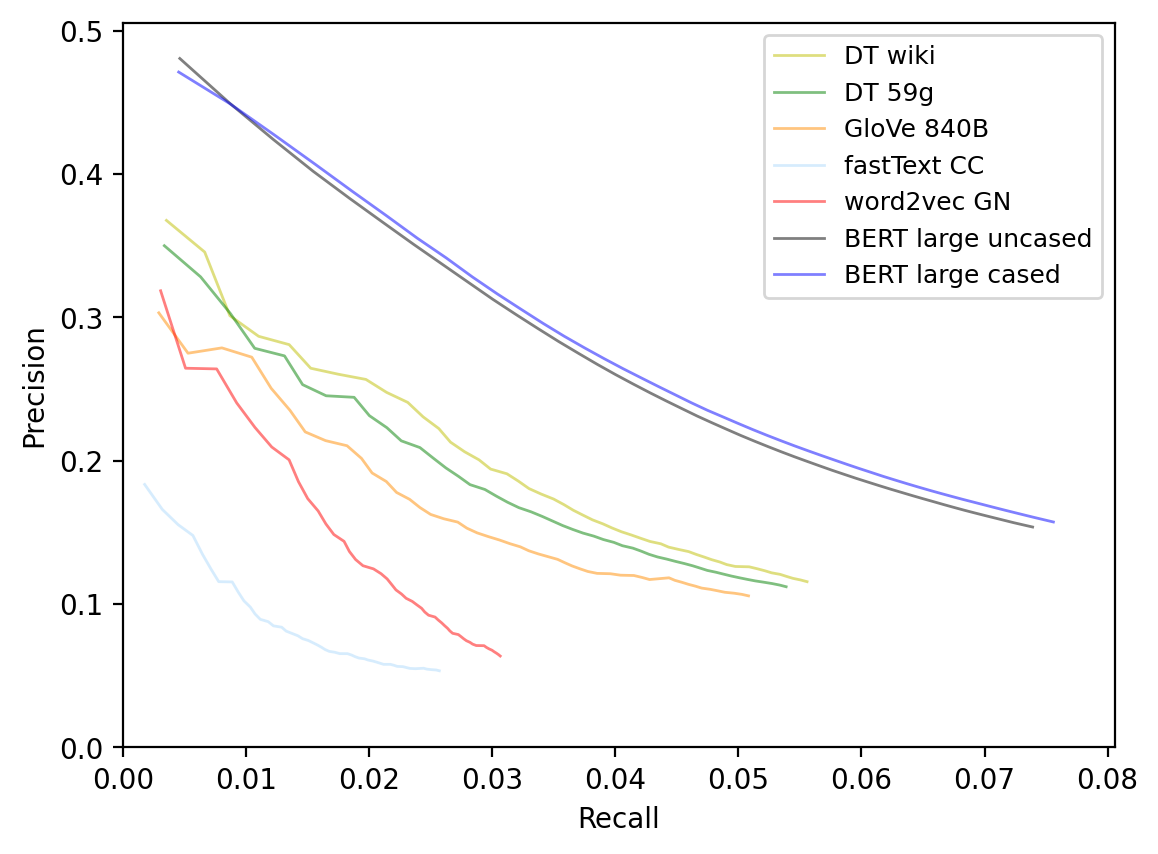

In [115]:
base_output_path = 'workdir/plots/'

output_path = base_output_path + 'swr_precision_recall_2.png'

# roles figure
# roles figure
experiments = [
    ("workdir/results/paper_roles_st/dt_wiki_lem", "DT wiki", 'y'),
    ("workdir/results/paper_roles_st/dt_59g_lem", "DT 59g", 'green'),
    ("workdir/results/paper_roles_st/glove_840B_nolem", 'GloVe 840B', '#FF8C00'),
    ("workdir/results/paper_roles_st/fasttext_cc_nolem", 'fastText CC', '#afdafc'),
    ("workdir/results/paper_roles_st/word2vec_googlenews_nolem", 'word2vec GN', 'red'),
    
    ("workdir/results/paper_roles_st/blu-ntok1-nunits1-nomask-k200", 'BERT large uncased', 'black'),
    ("workdir/results/paper_roles_st/blc-ntok1-nunits1-nomask-k200", 'BERT large cased', 'blue'),
    
    
    
#     ("workdir/results/paper_roles_st/fasttext_cc_lem", 'fastText lemm.'),
#     ("workdir/results/paper_roles_st/word2vec_googlenews_lem", 'word2vec lemm.'),
#     ('workdir/results/paper_roles_st/glove_840B_lem', 'glove lem'),
#     ('workdir/results/paper_roles_st/dt_wiki_nolem', 'dt wiki w/o lem'),
#     ('workdir/results/paper_roles_st/dt_59g_nolem', 'dt 59g w/o lem')
]


# colors = ['y',  'green',  '#FF8C00', '#afdafc', 'red',   'black', 'b',
#             '#660066', 'brown', '#FFC0CB', '#00FF00', 'red']

colors = [exp[-1] for exp in experiments]
experiments = [exp[:2] for exp in experiments]

curves = create_multiple_precision_recall_curves(experiments)
create_precision_recall_plot(curves, output_path=output_path, colors=colors, step=False)